In [2]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")

import numpy as np
from utility import Utility
from qiskit.visualization import plot_state_qsphere
from logger import Logger
from quantum_state import QuantumState
import copy
import matplotlib.pyplot as plt
from povm import Povm
from quantum_measurement import QuantumMeasurement

# 1 The Unitary Operator

In [9]:
num_sensor = 3
theta = 90
seed =  2

unitary_operator = Utility.generate_unitary_operator(theta, seed)
Utility.print_matrix('Unitary Operator:', unitary_operator.data)

Unitary Operator:
( 0.00000+0.84427i) ( 0.38402-0.37382i) 
(-0.38402-0.37382i) ( 0.00000-0.84427i) 


eigen value 1: 1j
eigen value 2: (1.1796119636642288e-16-1j)


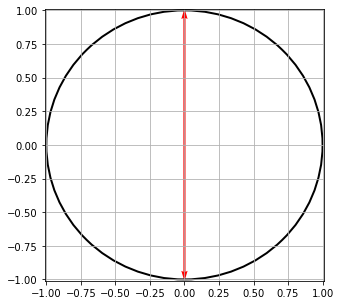

In [14]:
e_vals, e_vectors = np.linalg.eig(unitary_operator.data)

print('eigen value 1:', e_vals[0])
print('eigen value 2:', e_vals[1])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim([-1.01, 1.01])
ax.set_ylim([-1.01, 1.01])
circle = plt.Circle((0, 0), 1, fill=False, linewidth=2)
ax.add_patch(circle)
Ox = [0, 0]
Oy = [0, 0]
Vx = [e_vals[0].real, e_vals[1].real]
Vy = [e_vals[0].imag, e_vals[1].imag]
color = ['r', 'r']
plt.quiver(Ox, Oy, Vx, Vy, units='xy', color=color, scale=1)
plt.grid()
plt.show()

# 2 The Initial State by Hill Climbing and Guess | Visualization

In [3]:
# read from the logs

logs = ['../result/5.11.2022/verify']
data = Logger.read_log(logs)
initstate_hill = QuantumState(num_sensor)
initstate_guess = QuantumState(num_sensor)

In [24]:
for experiment in data:
    myinput = experiment[0]
    if myinput.unitary_theta != 90:
        continue
    print(myinput)
    output_by_method = experiment[1]
    if 'Hill climbing' in output_by_method:
        print(output_by_method['Hill climbing'].init_state)
        initstate_hill.set_statevector_from_str(output_by_method['Hill climbing'].init_state)
        print(f"Hill climbing success rate = {output_by_method['Hill climbing'].success}")
    if 'Guess' in output_by_method:
        print(output_by_method['Guess'].init_state)
        print(f"Guess success rate = {output_by_method['Guess'].success}")
        initstate_guess.set_statevector_from_str(output_by_method['Guess'].init_state)

{"experiment_id": 0, "num_sensor": 3, "priors": [0.3333, 0.3333, 0.3333], "unitary_seed": 2, "unitary_theta": 90.0}

Hill climbing
Initial state:
|000>:  0.04947  0.44774i
|001>:  0.19240 -0.03599i
|010>:  0.05576  0.23438i
|011>: -0.04222  0.19419i
|100>:  0.31208 -0.14945i
|101>:  0.36901 -0.04718i
|110>:  0.15573  0.34148i
|111>: -0.40504 -0.31337i

Hill climbing success rate = 0.9999784

Guess
Initial state:
|000>: -0.00349  0.12947i
|001>:  0.19850  0.20392i
|010>:  0.19850  0.20392i
|011>:  0.42490  0.00000i
|100>:  0.19850  0.20392i
|101>:  0.42490  0.00000i
|110>:  0.42490  0.00000i
|111>: -0.31088  0.31936i

Guess success rate = 0.9259149


Hill climb initial state:
 [ 0.04947+0.44774j  0.1924 -0.03599j  0.05576+0.23438j -0.04222+0.19419j
  0.31208-0.14945j  0.36901-0.04718j  0.15573+0.34148j -0.40504-0.31337j]


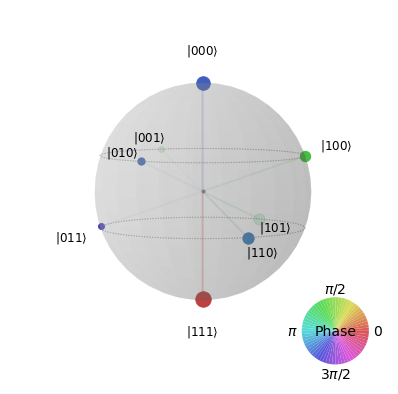

In [25]:
print('Hill climb initial state:\n', initstate_hill.state_vector)
plot_state_qsphere(initstate_hill.state_vector)
plt.show()

Guess initial state:
 [-0.00349+0.12947j  0.1985 +0.20392j  0.1985 +0.20392j  0.4249 +0.j
  0.1985 +0.20392j  0.4249 +0.j       0.4249 +0.j      -0.31088+0.31936j]


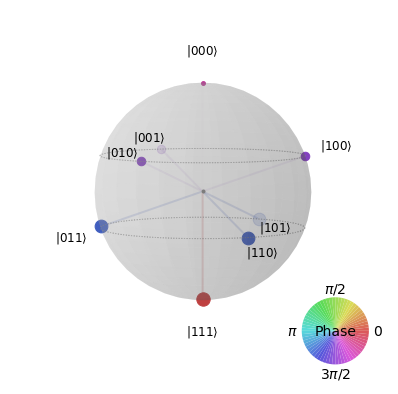

In [26]:
print('Guess initial state:\n', initstate_guess.state_vector)
plot_state_qsphere(initstate_guess.state_vector)
plt.show()

# 3 Prepare the States to be Discriminated from the Initial State

## 3.1 Hill Climbing

In [7]:
quantum_states_hill = []

for i in range(num_sensor):
    evolve_operator = Utility.evolve_operator(unitary_operator, num_sensor, i)
    init_state_copy = copy.deepcopy(initstate_hill)
    init_state_copy.evolve(evolve_operator)
    quantum_states_hill.append(init_state_copy)

In [8]:
for state in quantum_states_hill:
    print(state)

|000>: -0.31403 -0.13229i
|001>:  0.15446  0.00638i
|010>: -0.01042  0.12000i
|011>: -0.43664 -0.00457i
|100>:  0.02220 -0.45391i
|101>: -0.12717 -0.36964i
|110>:  0.35450 -0.24233i
|111>: -0.17576  0.28317i

|000>: -0.26898  0.11093i
|001>:  0.08676  0.25279i
|010>:  0.34626 -0.23751i
|011>:  0.07661 -0.02246i
|100>:  0.31363  0.33640i
|101>: -0.23286  0.34261i
|110>:  0.11259 -0.19075i
|111>: -0.42391  0.22214i

|000>: -0.31758 -0.04398i
|001>:  0.11799 -0.35287i
|010>: -0.14150  0.13743i
|011>:  0.23015 -0.07521i
|100>:  0.25025  0.10742i
|101>: -0.21555 -0.37081i
|110>: -0.56099  0.16255i
|111>: -0.19672  0.15261i



### 3.1.1 Hill Climb Check Orthogonal: the absolute value is very close to zero

In [16]:
n = len(quantum_states_hill)
for i in range(n):
    for j in range(i + 1, n):
        val = np.dot(np.conj(quantum_states_hill[i].state_vector), quantum_states_hill[j].state_vector)
        print(f'<state_{i}|state_{j}> = {val}, absolute value = {abs(val):.6f}')

<state_0|state_1> = (0.0001313091855962567+2.7755575615628914e-17j), absolute value = 0.000131
<state_0|state_2> = (0.0001478420362027444+2.7755575615628914e-17j), absolute value = 0.000148
<state_1|state_2> = (0.00015468827158135467+2.7755575615628914e-17j), absolute value = 0.000155


# 3.2 Guess

In [18]:
quantum_states_guess = []

for i in range(num_sensor):
    evolve_operator = Utility.evolve_operator(unitary_operator, num_sensor, i)
    init_state_copy = copy.deepcopy(initstate_guess)
    init_state_copy.evolve(evolve_operator)
    quantum_states_guess.append(init_state_copy)

In [19]:
for state in quantum_states_guess:
    print(state)

|000>:  0.04315  0.00116i
|001>: -0.00899  0.00875i
|010>: -0.00899  0.00875i
|011>: -0.00000  0.59758i
|100>:  0.22190 -0.21600i
|101>:  0.00000 -0.51124i
|110>:  0.00000 -0.51124i
|111>:  0.10645  0.10363i

|000>:  0.04315  0.00116i
|001>: -0.00899  0.00875i
|010>:  0.22190 -0.21600i
|011>:  0.00000 -0.51124i
|100>: -0.00899  0.00875i
|101>: -0.00000  0.59758i
|110>:  0.00000 -0.51124i
|111>:  0.10645  0.10363i

|000>:  0.04315  0.00116i
|001>:  0.22190 -0.21600i
|010>: -0.00899  0.00875i
|011>:  0.00000 -0.51124i
|100>: -0.00899  0.00875i
|101>:  0.00000 -0.51124i
|110>: -0.00000  0.59758i
|111>:  0.10645  0.10363i



### 3.2.1 Guess Check Orthogonal: absolute value far away from zero

In [20]:
n = len(quantum_states_guess)
for i in range(n):
    for j in range(i + 1, n):
        val = np.dot(np.conj(quantum_states_guess[i].state_vector), quantum_states_guess[j].state_vector)
        print(f'<state_{i}|state_{j}> = {val}, absolute value = {abs(val):.6f}')

<state_0|state_1> = (-0.3333295746915201+0j), absolute value = 0.333330
<state_0|state_2> = (-0.3333295746915201+0j), absolute value = 0.333330
<state_1|state_2> = (-0.3333295746915201+0j), absolute value = 0.333330


# 4 Let's do the Measurement!

## 4.1 Hill Climbing: Use Semidefinite Programming to Generate the POVM

In [52]:
povm_hill = Povm()

priors = [1./3, 1./3, 1./3]   # equal priors
povm_hill.semidefinite_programming_minerror(quantum_states_hill, priors, debug=False)

In [20]:
print(f'The theoretical success rate = {povm_hill.theoretical_success}')
print(f'The theoretical error rate = {povm_hill.theoretical_error}')

The theoretical success rate = 0.999987375212346
The theoretical error rate = 1.2624787653958691e-05


## 4.2 Hill climbing: Let's do the Quantum Measurement Simulation

In [23]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_hill, priors)
qm.povm = povm_hill
error = qm.simulate(simulate_seed, repeat)
print(f'The simulated error = {error}')

The simulated error = 3.7e-05


In [28]:
print(f'Hill climbing: the simulated error ({error}) is very close to the theoretical error ({povm_hill.theoretical_error})')

Hill climbing: the simulated error (3.7e-05) is very close to the theoretical error (1.2624787653958691e-05)


## 4.3 Guess: Use the Pretty Good Measurement to Generate the POVM and do Measurement Simulation

In [38]:
povm_guess = Povm()
povm_guess.pretty_good_measurement(quantum_states_guess, priors, debug=False)

In [39]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_guess, priors)
qm.povm = povm_guess
guess_prettygood_error = qm.simulate(simulate_seed, repeat)

In [40]:
print(f'Guess: pretty good measurement, the simulated error = {guess_prettygood_error}')

Guess: pretty good measurement, the simulated error = 0.073945


## 4.4 Guess: Use the Semidefinite Programming to Generate the POVM and do Measurement Simulation

In [51]:
povm_guess.semidefinite_programming_minerror(quantum_states_guess, priors, debug=False)

In [42]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_guess, priors)
qm.povm = povm_guess
guess_sdp_error = qm.simulate(simulate_seed, repeat)

In [43]:
print(f'Guess: semidefinte programming, the simulated error = {guess_sdp_error}')

Guess: semidefinte programming, the simulated error = 0.073956


In [45]:
print(f'Guess: the pretty good measurement simulated error ({guess_prettygood_error}) is very close to the SDP simulated error ({guess_sdp_error})')

Guess: the pretty good measurement simulated error (0.073945) is very close to the SDP simulated error (0.073956)


# 5 Comparing Hill climbing and Guess

In [50]:
print(f'When the theta is 90 degrees, by simulation, the success rate for Hill climbing is {povm_hill.theoretical_success:.6f}, which is larger than Guess success rate {1 - guess_prettygood_error}')

When the theta is 90 degrees, by simulation, the success rate for Hill climbing is 0.999987, which is larger than Guess success rate 0.926055
